In [2]:
import torch
import torch.nn as nn
import math 
import numpy as np
import matplotlib.pyplot as plt

In [140]:
tempPosList = []
time_len = 32
joint_num = 25
in_channel = 64
out_channel = 256
for t in range(time_len):
    for j_id in range(joint_num):
        tempPosList.append(t)

In [141]:
temporal_position = torch.from_numpy(np.array(tempPosList)).unsqueeze(1).float()

In [143]:
spatPosList = []
for t in range(time_len):
    for j_id in range(joint_num):
        spatPosList.append(j_id)

In [144]:
spatial_position = torch.from_numpy(np.array(spatPosList)).unsqueeze(1).float()

In [150]:
pe = torch.zeros(time_len*joint_num, in_channel)
div_term = torch.exp(torch.arange(0, in_channel, 2).float() *
                             -(math.log(10000.0)/in_channel))  # channel//2

In [153]:
pe[:, 0::2] = torch.sin(spatial_position * div_term)
pe[:, 1::2] = torch.cos(spatial_position * div_term)

In [159]:
pe = pe.view(time_len,joint_num, in_channel).permute(2, 0, 1).unsqueeze(0)
pe.shape

torch.Size([1, 64, 32, 25])

In [160]:
 config = [[64, 64, 16, 1], [64, 64, 16, 1],
              [64, 128, 32, 2], [128, 128, 32, 1],
              [128, 256, 64, 2], [256, 256, 64, 1],
              [256, 256, 64, 1], [256, 256, 64, 1],
              ]

In [168]:
out_channels = config[-1][1]
in_channels  = config[0][0]
num_channel  = 3

In [169]:
out_channels,in_channels, num_channel

(256, 64, 3)

In [43]:
def positional_encoding(max_position,d_model, min_freq=1e-4):
    
    position = np.arange(max_position)
    freqs    = min_freq**(2*(np.arange(d_model)//2)/d_model)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:,::2]  = np.cos(pos_enc[:,::2])
    pos_enc[:,1::2] = np.sin(pos_enc[:,::2])
    
    return pos_enc

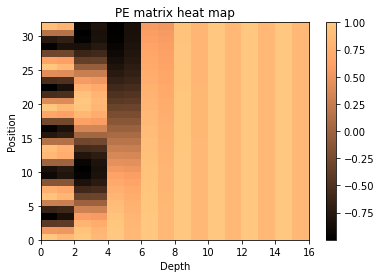

In [49]:
d_model = 16
max_pos = 32
mat = positional_encoding(max_pos, d_model)
plt.pcolormesh(mat,cmap='copper')
plt.xlabel('Depth')
plt.xlim(0,d_model)
plt.ylabel('Position')
plt.title("PE matrix heat map")
plt.colorbar()
plt.show()

In [3]:
import torch

In [5]:
a = torch.arange(6).reshape(2,3)

In [8]:
a

tensor([[0, 1, 2],
        [3, 4, 5]])

In [7]:
torch.einsum('ij->ji',[a])

tensor([[0, 3],
        [1, 4],
        [2, 5]])

In [9]:
a = torch.arange(6).reshape(2,3)

In [10]:
torch.einsum('ij->',[a])

tensor(15)

In [11]:
torch.einsum('ij->j',[a])

tensor([3, 5, 7])

In [13]:
torch.einsum('ij->i',[a])

tensor([ 3, 12])

In [14]:

b = torch.arange(3)

In [17]:
a

tensor([[0, 1, 2],
        [3, 4, 5]])

In [15]:
b

tensor([0, 1, 2])

In [16]:
torch.einsum('ik,k->i',[a,b])

tensor([ 5, 14])

In [18]:
a = torch.arange(6).reshape(2,3)
b = torch.arange(15).reshape(3,5)

In [20]:
a

tensor([[0, 1, 2],
        [3, 4, 5]])

In [21]:
b

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [19]:
torch.einsum('ik,kj->ij', [a,b])

tensor([[ 25,  28,  31,  34,  37],
        [ 70,  82,  94, 106, 118]])